# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from random import randint

#Modelo
from sklearn.metrics import mean_squared_log_error, r2_score


In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors='black'):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Base

In [6]:
bvsp = pd.read_csv('bvsp_modelado_normalizado.csv')
bvsp.head()

,data,abertura,alta,baixa,fechamento,var_abertura,media_movel_180,media_movel_240,media_movel_360,media_movel_480
0,1995-02-27,0.343464,0.357171,0.339941,0.349175,0.000000,0.470237,0.404127,0.290327,0.219652
1,1995-02-28,0.343215,0.356912,0.339694,0.348922,0.000000,0.469883,0.404610,0.291018,0.220202
2,1995-03-01,0.342959,0.356646,0.339442,0.348662,0.000000,0.469546,0.405098,0.291701,0.220747
3,1995-03-02,0.354952,0.354952,0.322321,0.324372,0.005806,0.478060,0.413233,0.297893,0.225463
4,1995-03-03,0.332129,0.335351,0.315751,0.332007,-0.031312,0.489400,0.423833,0.305882,0.231542


### Informações

In [7]:
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             6637 non-null   object 
 1   abertura         6637 non-null   float64
 2   alta             6637 non-null   float64
 3   baixa            6637 non-null   float64
 4   fechamento       6637 non-null   float64
 5   var_abertura     6637 non-null   float64
 6   media_movel_180  6637 non-null   float64
 7   media_movel_240  6637 non-null   float64
 8   media_movel_360  6637 non-null   float64
 9   media_movel_480  6637 non-null   float64
dtypes: float64(9), object(1)
memory usage: 518.6+ KB


### Transformar dados

In [8]:
#transforma variável data em datetime
bvsp['data'] = pd.to_datetime(bvsp['data'])
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             6637 non-null   datetime64[ns]
 1   abertura         6637 non-null   float64       
 2   alta             6637 non-null   float64       
 3   baixa            6637 non-null   float64       
 4   fechamento       6637 non-null   float64       
 5   var_abertura     6637 non-null   float64       
 6   media_movel_180  6637 non-null   float64       
 7   media_movel_240  6637 non-null   float64       
 8   media_movel_360  6637 non-null   float64       
 9   media_movel_480  6637 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 518.6 KB


In [9]:
#excluí colunas de lag, diff e estatística móvel
bvsp.drop(columns=['var_abertura', 'media_movel_180', 'media_movel_240', 'media_movel_360', 'media_movel_480'], inplace=True)
bvsp.columns

Index(['data', 'abertura', 'alta', 'baixa', 'fechamento'], dtype='object')

## Baseline

Criarei dois baselines para cada valor, considerando a média móves de 5 e 10 dias

Utilizarei os dados do segundo semestre de 2020 até o fim do dataset

In [10]:
#Alta média móvel de 5 e 10 dias
bvsp['alta_m5'] = bvsp['alta'].rolling(5).mean()
bvsp['alta_m10'] = bvsp['alta'].rolling(10).mean()

#Baixa média móvel de 5 e 10 dias
bvsp['baixa_m5'] = bvsp['baixa'].rolling(5).mean()
bvsp['baixa_m10'] = bvsp['baixa'].rolling(10).mean()

#Fechamento média móvel de 5 e 10 dias
bvsp['fechamento_m5'] = bvsp['fechamento'].rolling(5).mean()
bvsp['fechamento_m10'] = bvsp['fechamento'].rolling(10).mean()

base_validacao = bvsp.query('data>="2020-06-01"')
base_validacao

,data,abertura,alta,baixa,fechamento,alta_m5,alta_m10,baixa_m5,baixa_m10,fechamento_m5,fechamento_m10
6401,2020-06-01,0.331660,0.337823,0.329543,0.336309,0.335385,0.330249,0.327799,0.322518,0.332780,0.327479
6402,2020-06-02,0.333178,0.342291,0.333178,0.342291,0.336926,0.332267,0.329001,0.324224,0.335749,0.330059
6403,2020-06-03,0.338216,0.348104,0.338216,0.345474,0.339395,0.334824,0.331384,0.326399,0.337692,0.332733
6404,2020-06-04,0.343546,0.347754,0.340694,0.346634,0.341926,0.337096,0.333511,0.328742,0.340868,0.335003
6405,2020-06-05,0.343812,0.356698,0.343812,0.346736,0.346534,0.340404,0.337088,0.331291,0.343489,0.337647
...,...,...,...,...,...,...,...,...,...,...,...
6632,2021-05-10,0.376877,0.379144,0.376127,0.376479,0.376959,0.377380,0.372173,0.372392,0.375296,0.374920
6633,2021-05-11,0.376553,0.379827,0.371120,0.379827,0.377860,0.377494,0.372379,0.372265,0.377192,0.375543
6634,2021-05-12,0.380935,0.380935,0.370074,0.370854,0.378812,0.377700,0.372420,0.371973,0.376235,0.374810
6635,2021-05-13,0.372261,0.377594,0.372261,0.375355,0.379310,0.377571,0.372412,0.371870,0.376313,0.374904


## Gráficos baseline

#### Fechamento

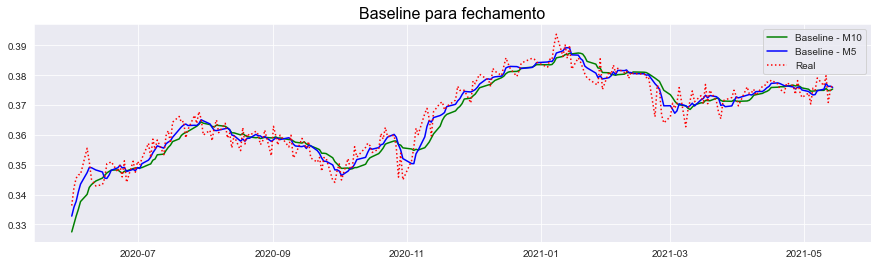

In [11]:
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['fechamento_m10'], color='green', label='Baseline - M10')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['fechamento_m5'], color='blue', label='Baseline - M5')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['fechamento'], color='red', linestyle='dotted', label='Real')
configuration(g4, title='Baseline para fechamento')

#### Baixa

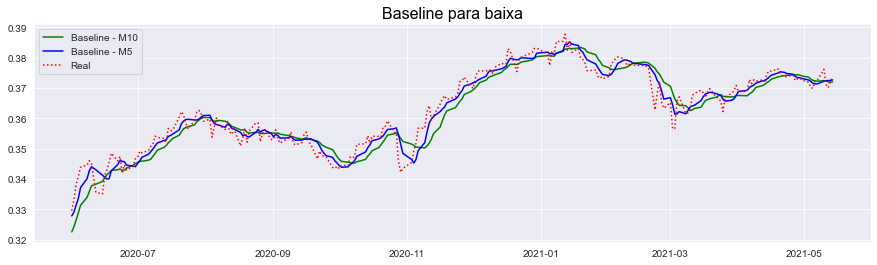

In [12]:
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['baixa_m10'], color='green', label='Baseline - M10')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['baixa_m5'], color='blue', label='Baseline - M5')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['baixa'], color='red', linestyle='dotted', label='Real')
configuration(g4, title='Baseline para baixa')

#### Alta

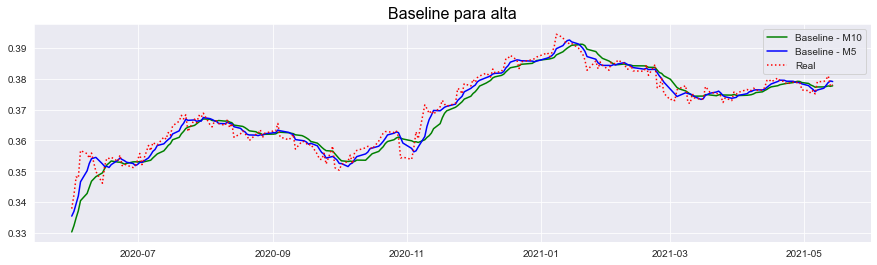

In [13]:
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['alta_m10'], color='green', label='Baseline - M10')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['alta_m5'], color='blue', label='Baseline - M5')
g4 = sns.lineplot(x=base_validacao['data'], y=base_validacao['alta'], color='red', linestyle='dotted', label='Real')
configuration(g4, title='Baseline para alta')

## Scores

In [14]:
def scores(y_real, y_previsto_m5, y_previsto_m10, nome):
    print(f'R2 Score para {nome} Média móvel 5')
    print(r2_score(y_real, y_previsto_m5))
    print('')
    print(f'Erro Médio Quadrático para {nome} Média móvel 5')
    print(mean_squared_log_error(y_real, y_previsto_m5))
    print('')
    print(f'R2 Score para {nome} Média móvel 10')
    print(r2_score(y_real, y_previsto_m10))
    print('')
    print(f'Erro Médio Quadrático para {nome} Média móvel 10')
    print(mean_squared_log_error(y_real, y_previsto_m10))

### Fechamento

In [15]:
scores(y_real=base_validacao['fechamento'], y_previsto_m5=base_validacao['fechamento_m5'],
       y_previsto_m10=base_validacao['fechamento_m10'], nome='FECHAMENTO')

R2 Score para FECHAMENTO Média móvel 5
0.9338205960551751

Erro Médio Quadrático para FECHAMENTO Média móvel 5
5.5425598223227935e-06

R2 Score para FECHAMENTO Média móvel 10
0.8761810011069449

Erro Médio Quadrático para FECHAMENTO Média móvel 10
1.0399285937890017e-05


### Baixa

In [16]:
scores(y_real=base_validacao['baixa'], y_previsto_m5=base_validacao['baixa_m5'],
       y_previsto_m10=base_validacao['baixa_m10'], nome='BAIXA')

R2 Score para BAIXA Média móvel 5
0.94896313115049

Erro Médio Quadrático para BAIXA Média móvel 5
4.477560736284146e-06

R2 Score para BAIXA Média móvel 10
0.88671316803787

Erro Médio Quadrático para BAIXA Média móvel 10
9.952237351289773e-06


### Alta

In [17]:
scores(y_real=base_validacao['alta'], y_previsto_m5=base_validacao['alta_m5'],
       y_previsto_m10=base_validacao['alta_m10'], nome='ALTA')

R2 Score para ALTA Média móvel 5
0.9623945381888527

Erro Médio Quadrático para ALTA Média móvel 5
2.958510421298354e-06

R2 Score para ALTA Média móvel 10
0.9093203900372221

Erro Médio Quadrático para ALTA Média móvel 10
7.153436011974394e-06


## Conclusão

O melhor baseline considera a média móvel de 5 dias para as previsões, portanto serão esses os valores considerados